In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr

ImportError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/d5.csv",index_col='Date',parse_dates=True)
print("="*50)
print(df.head(5),"\n")


            Price  Temperature  Population  Export  Consumption
Date                                                           
2001-01-15   8.17        31.35      283960   25547      2676998
2001-02-15   5.61        33.98      284166   26882      2309464
2001-03-15   5.23        41.49      284380   32121      2246633
2001-04-15   5.19        53.08      284602   23637      1807170
2001-05-15   4.19        62.82      284834   28981      1522382 



In [ ]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df.Temperature, df.Consumption)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.690


In [ ]:
corr, _ = pearsonr(df.Population, df.Consumption)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.512


In [ ]:
corr, _ = pearsonr(df.Export, df.Consumption)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.566


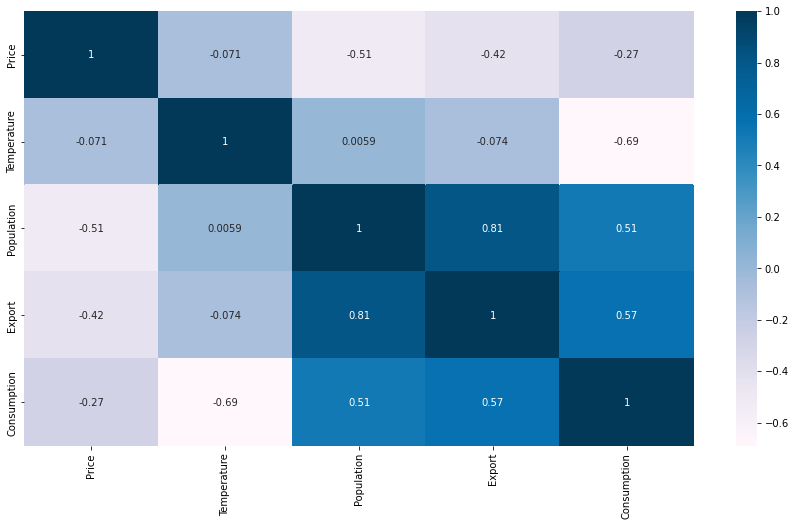

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap = 'PuBu')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df.describe()

,Price,Temperature,Population,Export,Consumption
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,4.436824,53.361020,311480.792157,169999.337255,2.129599e+06
std,2.166380,15.121109,15109.102746,149526.131155,4.746990e+05
min,1.630000,29.640000,283960.000000,23637.000000,1.368369e+06
25%,2.850000,39.415000,298285.500000,64652.000000,1.743224e+06
50%,3.870000,53.240000,312605.000000,119470.000000,2.069773e+06
75%,5.560000,68.070000,325652.000000,235171.500000,2.434400e+06
max,13.420000,76.770000,332812.000000,637564.000000,3.583251e+06


In [ ]:
train_size = 231
test_size = 24
train, test = df.iloc[0:train_size], df.iloc[219:len(df)]
print(len(train), len(test))

231 36


In [ ]:
test

,Price,Temperature,Population,Export,Consumption
Date,,,,,
2019-04-15,2.65,52.84,330103,338213,2212386
2019-05-15,2.64,59.49,330240,368568,2133985
2019-06-15,2.40,68.72,330393,360226,2119341
2019-07-15,2.37,74.62,330553,393400,2393904
2019-08-15,2.22,73.74,330729,384983,2433924
2019-09-15,2.56,68.43,330904,394511,2206252
2019-10-15,2.33,52.05,331066,425775,2306544
2019-11-15,2.65,41.11,331213,441944,2783754
2019-12-15,2.22,36.43,331345,481757,3170717


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2001-01-15 to 2022-03-15
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        255 non-null    float64
 1   Temperature  255 non-null    float64
 2   Population   255 non-null    int64  
 3   Export       255 non-null    int64  
 4   Consumption  255 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 12.0 KB


In [ ]:
df.columns

Index(['Price', 'Temperature', 'Population', 'Export', 'Consumption'], dtype='object')

In [ ]:
f_columns = ['Price', 'Temperature', 'Population', 'Export']

f_transformer = MinMaxScaler()
cnt_transformer = MinMaxScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Consumption']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Consumption'] = cnt_transformer.transform(train[['Consumption']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Consumption'] = cnt_transformer.transform(test[['Consumption']])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [ ]:
time_steps = 24

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Consumption, time_steps)
X_test, y_test = create_dataset(test, test.Consumption, time_steps)

print(X_train.shape, y_train.shape)

(207, 24, 5) (207,)


In [ ]:
print(X_test.shape, y_test.shape)

(12, 24, 5) (12,)


In [ ]:
y_train

array([0.64796664, 0.55057533, 0.40349904, 0.18247725, 0.07117353,
       0.        , 0.11290008, 0.13775303, 0.02927381, 0.08989593,
       0.1873957 , 0.43546653, 0.63594728, 0.55581967, 0.35631122,
       0.18327543, 0.09955286, 0.05608889, 0.10533612, 0.10194544,
       0.05534276, 0.09185854, 0.20157612, 0.46663048, 0.58050968,
       0.42541124, 0.40731775, 0.17340448, 0.07502385, 0.08062179,
       0.15479104, 0.15892201, 0.02632673, 0.02911476, 0.14350224,
       0.46596411, 0.38760942, 0.37744858, 0.36868906, 0.15206527,
       0.07681573, 0.08877235, 0.18987195, 0.18644285, 0.0455759 ,
       0.1341785 , 0.1931026 , 0.36694532, 0.53855111, 0.58300733,
       0.36989338, 0.2148465 , 0.09276129, 0.09088672, 0.1417911 ,
       0.25670486, 0.10803611, 0.12618213, 0.22673891, 0.50137091,
       0.66422447, 0.55208608, 0.44251539, 0.22155294, 0.10117937,
       0.11473137, 0.16550734, 0.15299866, 0.04501849, 0.13009082,
       0.24347972, 0.50163746, 0.66215485, 0.46896956, 0.39025

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20,activation='ReLU', input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.LSTM(10,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(40,input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
history = model.fit(X_train, y_train,
                              epochs=50,
                              batch_size=1,
                              shuffle=False)


Epoch 1/50
207/207 [==============================] - 7s 19ms/step - loss: 0.0166
Epoch 2/50
207/207 [==============================] - 3s 15ms/step - loss: 0.0102
Epoch 3/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0089
Epoch 4/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0070
Epoch 5/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0064
Epoch 6/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0077
Epoch 7/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0061
Epoch 8/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0059
Epoch 9/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0056
Epoch 10/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0054
Epoch 11/50
207/207 [==============================] - 2s 11ms/step - loss: 0.0053
Epoch 12/50
207/207 [==============================] - 2s 10ms/step - loss: 0.0052
Epoch 13/50
2

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[0.4464561 ],
       [0.35763508],
       [0.39167184],
       [0.47663546],
       [0.5333561 ],
       [0.5212579 ],
       [0.4671389 ],
       [0.5183498 ],
       [0.7187573 ],
       [0.80863315],
       [0.77804637],
       [0.69786286]], dtype=float32)

In [ ]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)

In [ ]:
actual= pd.DataFrame(y_test_inv.reshape(-1,1),columns=['actual'])
prediction = pd.DataFrame(y_pred_inv,columns=['prediction'])

In [ ]:
prediction


,prediction
0,2286252.75
1,2103642.75
2,2173620.00
3,2348299.75
4,2464913.50
5,2440040.25
6,2328775.25
7,2434061.50
8,2846086.00
9,3030864.50


In [ ]:
result =pd.concat([actual,prediction],axis=1).set_index(test.iloc[24:,:].index)
result

,actual,prediction
Date,,
2021-04-15,2241193.0,2286252.75
2021-05-15,2093551.0,2103642.75
2021-06-15,2217251.0,2173620.00
2021-07-15,2386084.0,2348299.75
2021-08-15,2410273.0,2464913.50
2021-09-15,2110967.0,2440040.25
2021-10-15,2237715.0,2328775.25
2021-11-15,2659971.0,2434061.50
2021-12-15,2979653.0,2846086.00


In [ ]:
mean_absolute_percentage_error(y_test_inv.flatten(),y_pred_inv.flatten())

0.05010391325401395

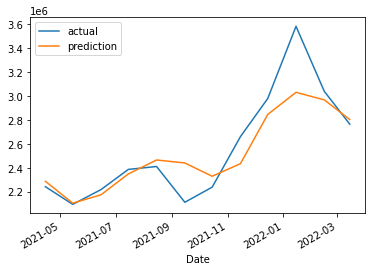

In [ ]:
result.plot()

In [ ]:
score = r2_score(y_test_inv.flatten(),y_pred_inv.flatten())
score

0.7801270728783207

In [ ]:
mean_error = mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten())
mean_error


42141141174.989624

In [ ]:
mae = mean_absolute_error(y_test_inv.flatten(),y_pred_inv.flatten())
mae

136147.4166666667

In [ ]:
rmse = mean_squared_error(y_test_inv.flatten(),y_pred_inv.flatten(),squared=False)
rmse

205283.07571494934